##### Overview

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, the target to complete the analysis of what sorts of people were likely to survive.

https://www.kaggle.com/c/titanic/data

## Importing libraries

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc ={'figure.figsize':(12,10)})
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [238]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Type of Features**
- **Categorical**  - Sex , Embarked
- **Continous** - Age, Fare
- **Discrete** - SibSp, Parch
- **Alpanumeric** - Cabin

In [240]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [241]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Numerical Value Analysis

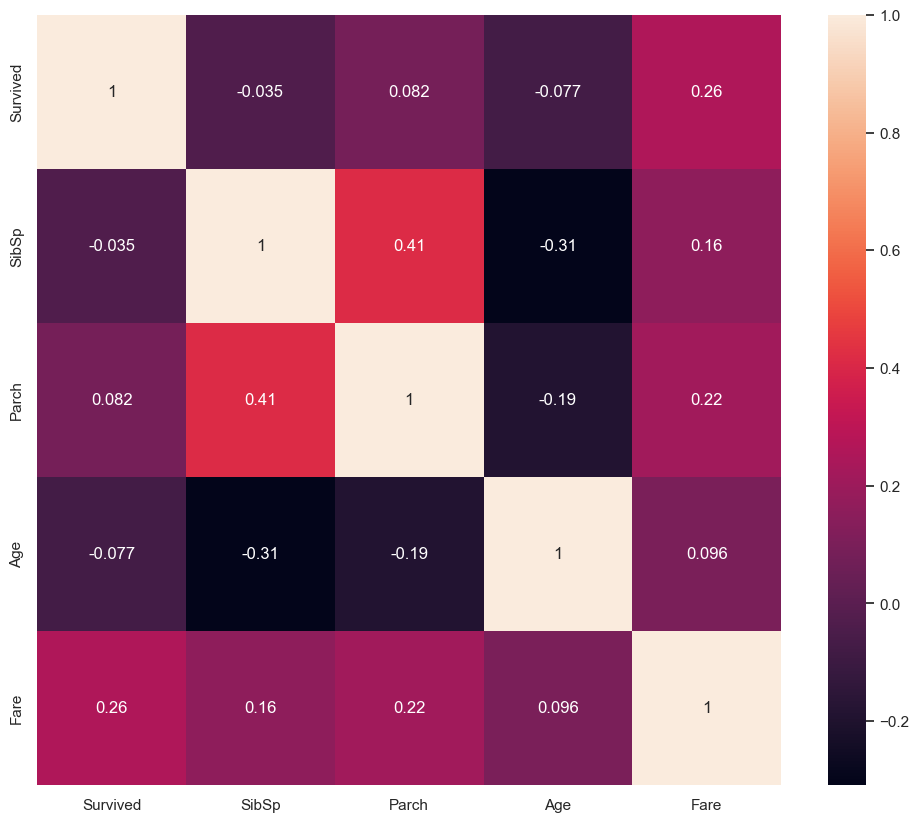

In [242]:
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare"]].corr(),
                      annot=True)

**Conlusion**

Only Fare feature seem to have a significant correlation with the target feature

But there might be chances of correlation present in the Subpopluations of the dataset, Thus exploring the dataset to find out coressponding analysis

__sibsp - Number of siblings/ spouses aboard Titanic__

In [243]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

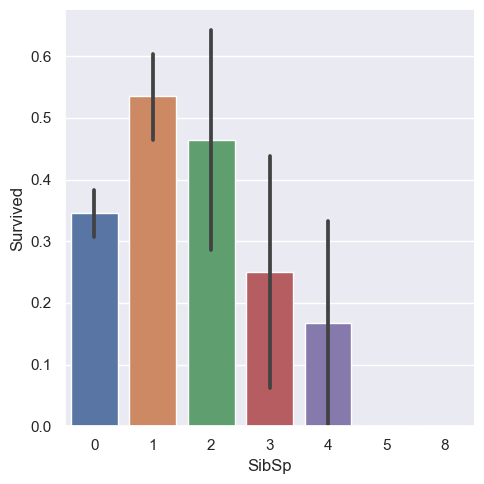

In [244]:
bar_sibsp = sns.catplot(x='SibSp',
                           y='Survived',
                           data = df, 
                           kind='bar',
                           )


survival probalvity of passengers having no (0) or 1 or 2 siblings are high


**AGE**

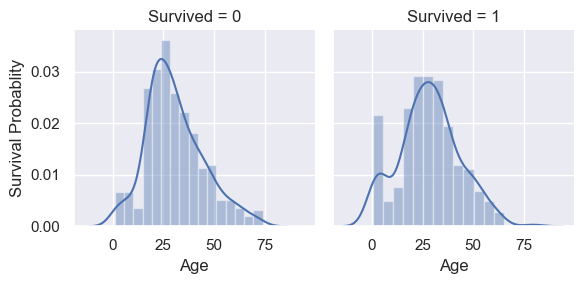

In [245]:
age_graph = sns.FacetGrid(data= df,col='Survived',sharey=True)
age_graph = age_graph.map(sns.distplot,'Age')
age_graph = age_graph.set_ylabels('Survival Probablity')


Age distribution seems to likely a gaussian distribution

we can notice that both the graphs are not same.  Survived passengers includes  more passenger with very less age than those who have not survied. Also the graph where people survived seems more flat for age group 60-80

Thus , regardless of the correlation matrix, Age shows a significant effect on the Survival probablity, As  young passengers have high chances of survival

**Sex**

In [246]:
data = df.groupby(df['Survived'])
data.Sex.value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

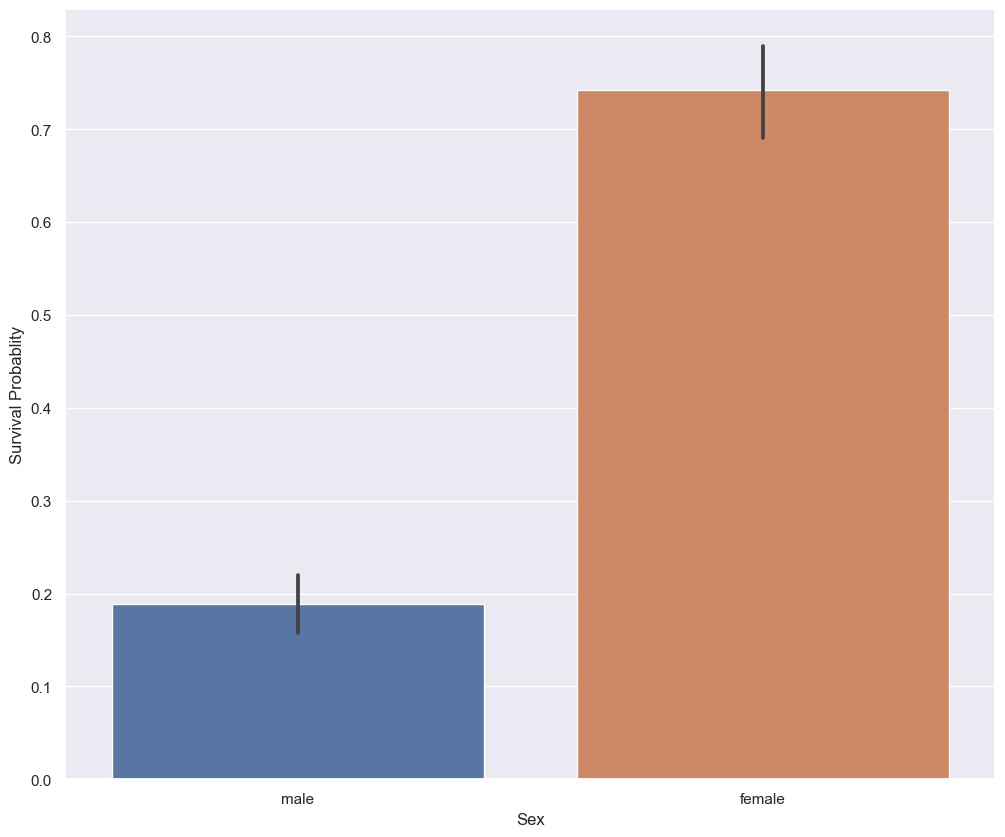

In [247]:
gender_plot = sns.barplot(x='Sex',y='Survived',data = df)
gender_plot = gender_plot.set_ylabel('Survival Probablity')

In [248]:
df[['Survived','Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


Even though the data is not evenly distributed among the sex feature, we can clearly see that females had more chances of survival than males.

Thus `Sex` might be an important feature in detemining the survival probablity

**P-class**

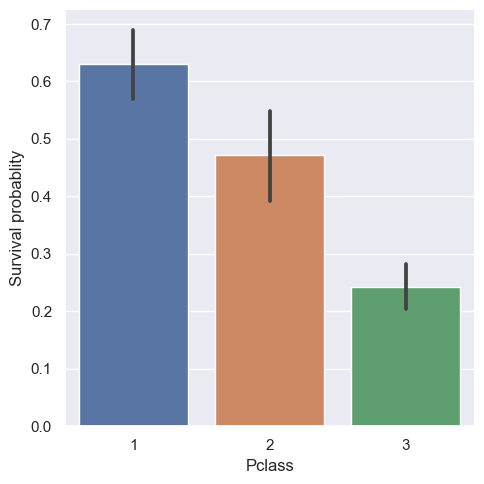

In [249]:
pclass_graph = sns.catplot(x='Pclass',
                           y='Survived',
                           data=df,
                           kind='bar')
pclass_graph= pclass_graph.set_ylabels('Survival probablity') 

Passengeres with higher class  has high chances of survival as compared to lower class passengers

**Pclass vs Survived, group by Sex**

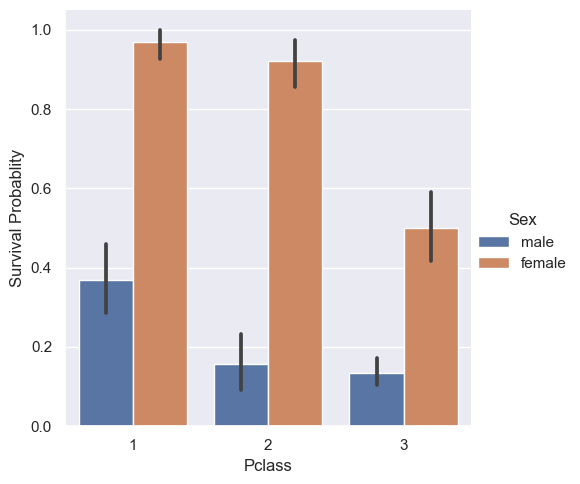

In [250]:
figure = sns.catplot(x='Pclass',
                     y='Survived',
                     hue='Sex',
                     kind='bar',
                     data=df)
figure = figure.set_ylabels('Survival Probablity')


**Embarked**

In [251]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [252]:
#Filling the null values of Embarked with mode
df['Embarked'] = data['Embarked'].fillna('S')

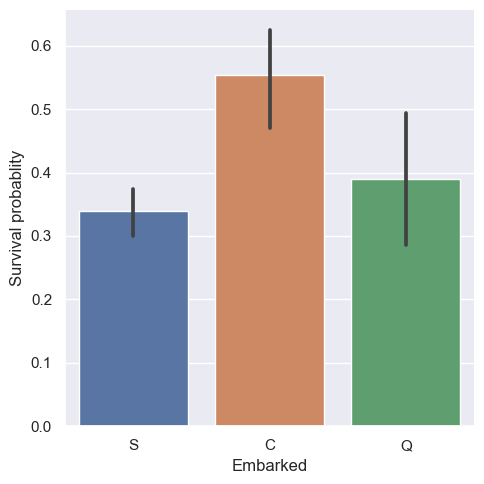

In [253]:
embrk_graph = sns.catplot(x='Embarked',
                            y='Survived',
                            kind='bar',
                            data=df)
embrk_graph = embrk_graph.set_ylabels('Survival probablity')

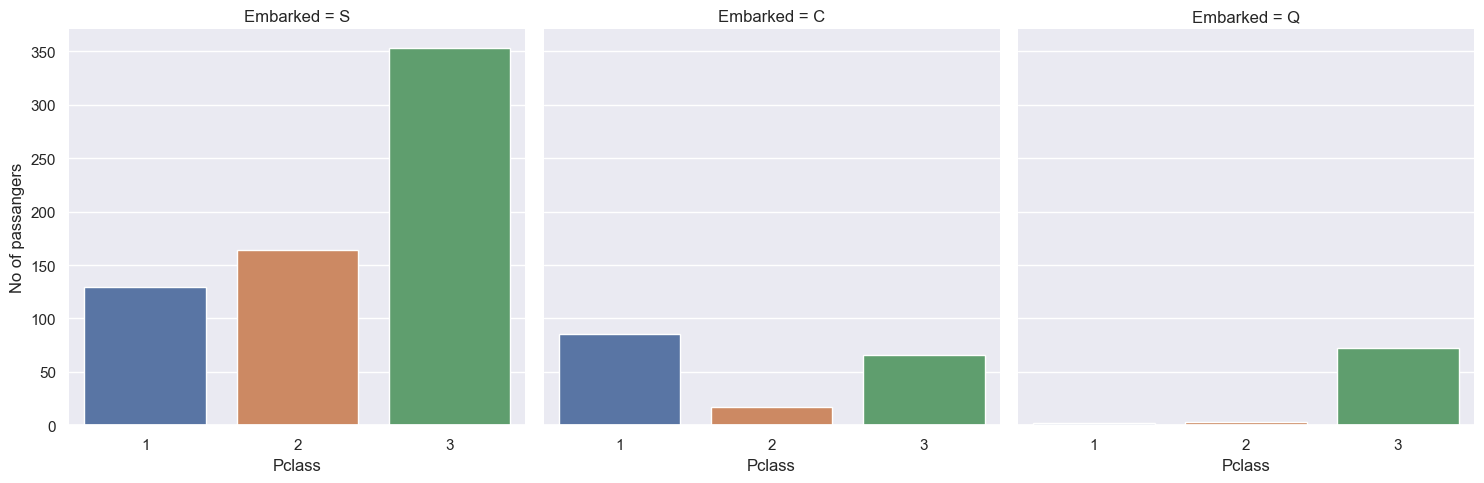

In [254]:
# lets check if passenger emabarked from `C` are first class passenger are not
embVsclass = sns.catplot(x='Pclass',
                         col='Embarked',
                         data=df,
                         kind = 'count')
embVsclass.despine(left=True)
embVsclass = embVsclass.set_ylabels('No of passangers')

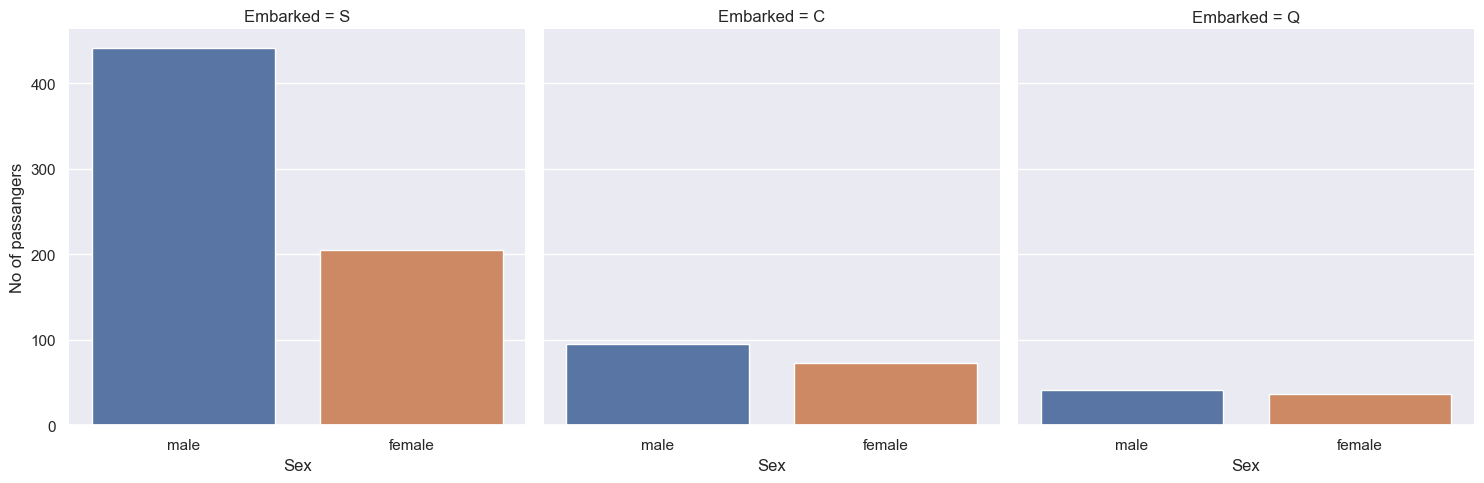

In [255]:
# lets check if passenger emabarked from `C` are morely females are not
embVsclass = sns.catplot(x='Sex',
                         col='Embarked',
                         data=df,
                         kind = 'count')
embVsclass.despine(left=True)
embVsclass = embVsclass.set_ylabels('No of passangers')

Cherbourg passengers are mostly in first class , and thus have high chances of survivals

Southampton (S) and Queenstown(Q) passengers are mostly third class

## Preparing the Data

In [256]:

mean = df.Age.mean()
std = df.Age.std()

is_null = df['Age'].isnull().sum()

In [257]:
mean,std,is_null

(29.69911764705882, 14.526497332334042, 177)

In [258]:
#computing random number between the inter quartile range
np.random.seed(42)
random_age = np.random.randint(mean-std, mean+std, size=is_null)
random_age

array([21, 34, 43, 29, 25, 22, 43, 35, 21, 40, 33, 37, 25, 25, 38, 35, 18,
       22, 38, 17, 36, 35, 16, 38, 26, 20, 16, 42, 35, 15, 26, 40, 36, 43,
       26, 39, 31, 41, 41, 24, 42, 42, 30, 29, 29, 33, 26, 37, 34, 39, 17,
       19, 33, 21, 35, 23, 21, 32, 18, 39, 42, 28, 32, 40, 23, 40, 35, 16,
       34, 42, 29, 42, 21, 26, 43, 22, 29, 17, 28, 31, 18, 32, 22, 18, 16,
       20, 36, 24, 18, 36, 43, 32, 40, 26, 16, 24, 18, 28, 30, 29, 22, 28,
       37, 42, 39, 22, 35, 30, 27, 32, 29, 35, 38, 40, 39, 42, 42, 42, 27,
       23, 43, 29, 27, 15, 39, 21, 23, 38, 15, 26, 22, 38, 25, 33, 31, 22,
       17, 17, 15, 41, 19, 24, 21, 40, 23, 42, 21, 23, 22, 26, 16, 15, 30,
       37, 37, 38, 19, 17, 26, 22, 36, 41, 17, 15, 17, 19, 29, 28, 17, 15,
       19, 40, 37, 28, 21, 41, 23])

In [259]:
# filling the null values in Age with randomly created ndarray
dummy = df['Age'].copy()
dummy[np.isnan(dummy)] = random_age
df['Age'] = dummy
df.Age.isnull().sum()

0

In [260]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [261]:
col_to_drop = ['Name','PassengerId','Cabin','Ticket']
df.drop(col_to_drop,axis=1,inplace=True)

In [262]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,21.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [263]:
genders = {'male':0,
           'female': 1}
df['Sex'] = df['Sex'].map(genders)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [264]:
emb_port = {'S':0,
            'C':1,
            'Q':2}
df['Embarked'] = df['Embarked'].map(emb_port)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## Spliting the Data

In [266]:
X = df.drop(['Survived'], axis = 1)
y = df['Survived']


In [267]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [268]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [269]:
#spliting the dataset into train, test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## Feature Scaling

In [270]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(X_train)
Xtest = scaler.transform(X_test)

# Classification

In [271]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=0)
knn_classifier = KNeighborsClassifier(n_neighbors=5)


In [272]:
logreg.fit(Xtrain,y_train)
svc_classifier.fit(Xtrain,y_train)
dt_classifier.fit(Xtrain,y_train)
rf_classifier.fit(Xtrain,y_train)
knn_classifier.fit(Xtrain,y_train)

KNeighborsClassifier()

In [273]:
logreg_pred = logreg.predict(Xtest)
svc_classifier_pred = svc_classifier.predict(Xtest)
dt_classifier_pred = dt_classifier.predict(Xtest)
rf_classifier_pred = rf_classifier.predict(Xtest)
knn_classifier_pred = knn_classifier.predict(Xtest)


In [274]:
#evavluting model performance by accuracy

from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test,logreg_pred)
svc_classifier_acc = accuracy_score(y_test,svc_classifier_pred)
dt_classifier_acc = accuracy_score(y_test,dt_classifier_pred)
rf_classifier_acc = accuracy_score(y_test,rf_classifier_pred)
knn_classifier_acc = accuracy_score(y_test,knn_classifier_pred)

In [275]:
print('Logistic Regression   :  ',round(logreg_acc*100,2))
print('Support Vector        :  ',round(svc_classifier_acc*100,2))
print('Decision Tree         :  ',round(dt_classifier_acc*100,2))
print('Random Forest         :  ',round(rf_classifier_acc*100,2))
print('K-NN classifier       :  ',round(knn_classifier_acc*100,2))

Logistic Regression   :   81.02
Support Vector        :   83.05
Decision Tree         :   73.9
Random Forest         :   79.66
K-NN classifier       :   77.29
